In [113]:
import tensorflow as tf
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import os

def create_dataset():
    """
    x_train, x_test: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).
    y_train, y_test: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,).

    Doc: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
    """

    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    return x_train, y_train, x_test, y_test

def create_model(summary=False):
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10)
    ])

    if summary:
        model.summary()
    
    return model

def create_predictions(model, log=False):
    """
    Arguments:
    ----------
    Model : tensorflow.python.keras.engine.sequential.Sequential'
    
    Return
    ------
    predictions : numpy.ndarray shape(1,10)
    """
    predictions = model(x_train[:1]).numpy()

    if log:
        print(type(predictions))
        print(predictions.shape)

    return predictions

# Define loss function.
def create_loss_function(log=False):
    """
    Return
    ------
    loss_fn : tensorflow.python.keras.losses.SparseCategoricalCrossentropy
    """
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    if log:
        print(type(loss_fn))
        print(loss_fn)

    return loss_fn

def compile_model(model, optimizer="adam", loss_fn=loss_fn):
    """
    Arguments
    ---------
    Model     : tensorflow.python.keras.engine.sequential.Sequential
    loss_fn   : tensorflow.python.keras.losses.SparseCategoricalCrossentropy
    optimizer : str
    """    

    # Configure the model for training.
    # Doc compile(): https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])
    
    return model


def train_model(model, x_train, y_train, optimizer="adam", epochs=5):
    """
    Arguments
    ---------
    Model     : tensorflow.python.keras.engine.sequential.Sequential
    x_train   : uint8 arrays of grayscale image dataset. shape is 3 dimentional.
    y_train   : Label single array data.
    """    
    print(type(x_train))
    print(x_train.shape)
    print(type(y_train))
    print(y_train.shape)

    # Training.
    # Trains the model for a fixed number of epochs (iterations on a dataset).
    # Doc fit(): https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
    history = model.fit(x_train, y_train, epochs=epochs)
    
    return (model, history.history)


def save_weights(model, checkpoint_path="weights/checkpoint.ckpt"):
    """Save weights(checkpoint)"""
    model.save_weights(checkpoint_path)
    
    
def train_model_from_checkpoint(model, test_images, train_labels, checkpoint_path="weights/checkpoint.ckpt"):
    """
    Train model with saved weights(checkpoint). 
    
    [save and load models: Tensorflow Document]
    https://www.tensorflow.org/tutorials/keras/save_and_load
    
    Arguments
    ---------
    model           : compiled model. 
    test_images     : x_train
    train_labels    : y_labels
    checkpoint_path : str
    
    Return
    ------
    model : trained model.
    history.history : dict
        history dictionary containing ["accuracy", "loss"]
    """
    # Create checkpoint load object.
    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path, # Checkpoint filepath.
        verbose=1,                # Verbosity. 0 or 1.
        save_weights_only=True,   # If true, only weights file will be saved.
        period=5)

    # Train model with checkpoint.
    history = model.fit(x_train,  # Training image data.
                        y_train,  # Training label data.
                        epochs=3, # Number of times to train. 
                        callbacks=[cp_callback], # Checkpoint callback object.
                        verbose=1 # Verbosity. 0 or 1.)

    return model, history.history


def visualize_history(history):
    """
    Visualization accuracy and loss data based on fit().
    
    Arguments
    ---------
    history : dict
        Dictionary data of hisotyr containing ["accuracy", "loss"]
    """
    accuracy = history["accuracy"]
    loss = history["loss"]
    
    # Store in DataFrame for visualization. 
    iter_num = len(accuracy) + 1
    history_df = pd.DataFrame({
        "times": [i for i in range(1, iter_num)],
        "accuracy": accuracy,
        "loss": loss,
    })

    # Display table.
    display(history_df)

    # Lineplot with seaborn.
    sns.set_style("darkgrid")
    sns.lineplot(x="times", 
                 y="accuracy", 
                 data=history_df[["times", "accuracy"]]).set_title("accuracy")
    plt.show()

    sns.lineplot(x="times", 
                 y="loss", 
                 data=history_df[["times", "loss"]]).set_title("loss")
    plt.show()
    
def evaluate_model(model, x_test, y_test):
    # Check model performance. 
    # evaluate(): Returns the loss value & metrics values for the model in test mode.
    # Doc: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
    model.evaluate(x_test,  y_test, verbose=2)


<class 'tensorflow.python.keras.losses.SparseCategoricalCrossentropy'>
<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.9130


,times,accuracy,loss
0,1,0.913017,0.296851


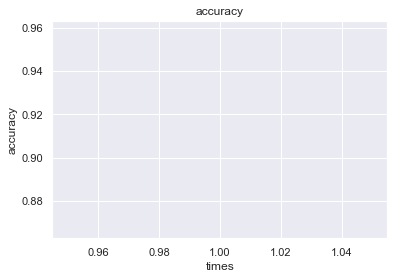

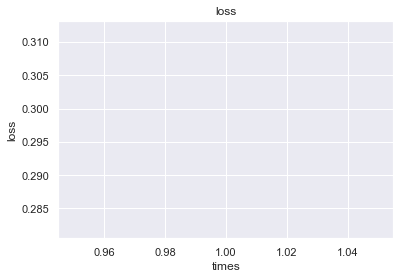

313/313 - 1s - loss: 0.1472 - accuracy: 0.9556


In [119]:
if __name__ == "__main__":
    # Load dataset.
    x_train, y_train, x_test, y_test = create_dataset()

    # Create model.
    model = create_model()

    # Create predictions.
    predictions = create_predictions(model)

    # Create loss function.
    loss_fn = create_loss_function(log=True)
    
    compiled_model = compile_model(model, loss_fn)

    # Training model.
    model, history = train_model(compiled_model, x_train, y_train, epochs=5)
    #model, history = train_model_from_checkpoint(compiled_model, x_train, y_train)
    
    # Save model
    save_weights(model)
    
    # Visualize Hisotyr data.
    visualize_history(history)
    
    # Evaluate model.
    evaluate_model(model, x_test, y_test)